In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score
import scikitplot as skplt

In [7]:
test = pd.read_csv("aps_failure_test_set.csv", na_values='na')
test.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


In [8]:
simple_imputer = joblib.load("SimpleImputer.pkl")  # load the preprossing imputer  # load the best classifier 
important_columns = joblib.load("important_columns.pkl") # load imp columns

In [9]:
model = joblib.load("XGBClassifier.pkl") 

# Funtion 1

In [10]:
def prediction_F1(X):
    X = X.drop(['br_000','bq_000','bp_000','bo_000','ab_000','cr_000','bn_000','bm_000'],axis=1) # drop the Missing columns
    X = simple_imputer.transform(X[important_columns]) # Load preprocessing models with imp columns
    X = pd.DataFrame(X,columns=[important_columns])   
    return model.predict(X)                           # predict on Test data


In [11]:
prediction_F1(test[:5])

array([0, 0, 0, 0, 0], dtype=int64)

# Funtion 2

In [12]:
def prediction_F2(X,y):
    y = y.apply(lambda x: 0 if x == 'neg' else 1)  # labeling on Target data
    X = X.drop(['br_000','bq_000','bp_000','bo_000','ab_000','cr_000','bn_000','bm_000'],axis=1) # drop the missing columns
    X = simple_imputer.transform(X[important_columns])
    X = pd.DataFrame(X,columns=[important_columns])   
    pred = model.predict(X)                            # predict on Test data
    print('-'*40)
    print("Accuracy Score :",accuracy_score(pred,y))  # Calculate the Accuracy Score
    print("Recall Score   :",recall_score(pred,y))    # Calculate the recall Score
    print('-'*40)
    print("Confusion Matrix")
    skplt.metrics.plot_confusion_matrix(pred, y, normalize=False)
    plt.show()
    print('-'*40)
    tn, fp, fn, tp = confusion_matrix(pred,y).ravel()
    print("Cost :",10*fp + 500*fn)                      # cost 
    return pred

In [13]:
y_test = test['class']
x_test = test.drop('class',axis=1)

----------------------------------------
Accuracy Score : 0.9939375
Recall Score   : 0.9572368421052632
----------------------------------------
Confusion Matrix


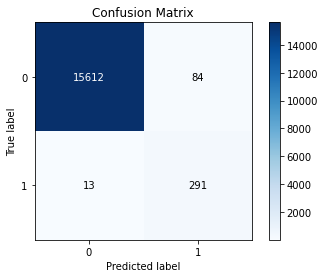

----------------------------------------
Cost : 7340


In [14]:
 pred = prediction_F2(x_test,y_test)

In [24]:
!pip install scikit-plot

  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
